### Import Libraries

In [1]:
import numpy as np 
import pandas as pd

from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
df = pd.read_csv('cod.csv')

In [3]:
df.head()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


### Data Preliminary Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [5]:
#checking null data

df.isnull().sum()

name              0
wins              0
kills             0
kdRatio           0
killstreak        0
level             0
losses            0
prestige          0
hits              0
timePlayed        0
headshots         0
averageTime       0
gamesPlayed       0
assists           0
misses            0
xp                0
scorePerMinute    0
shots             0
deaths            0
dtype: int64

In [6]:
# drop name column

df.drop(columns=['name'], inplace=True)

In [7]:
# data description

df.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

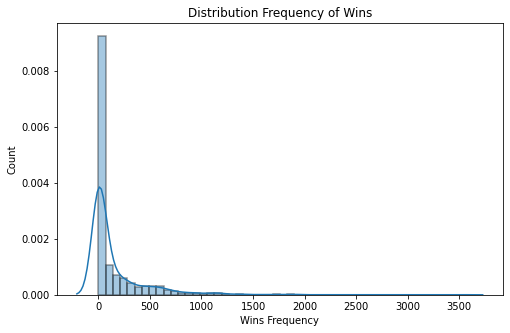

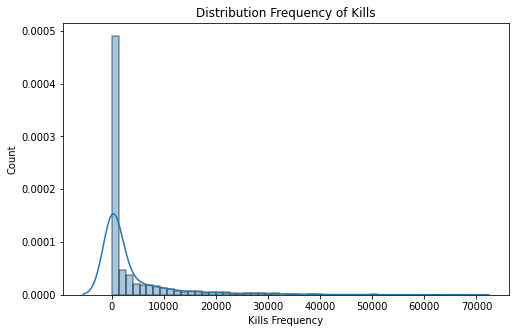

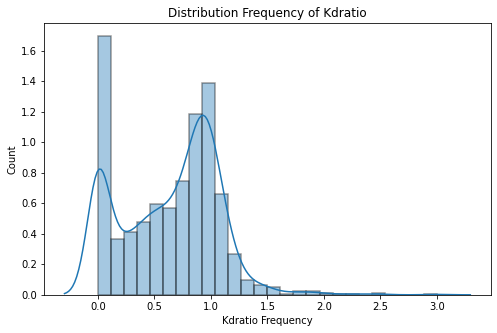

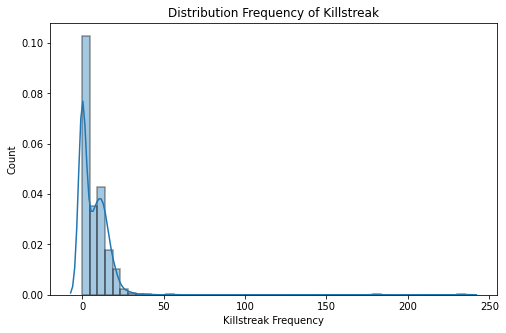

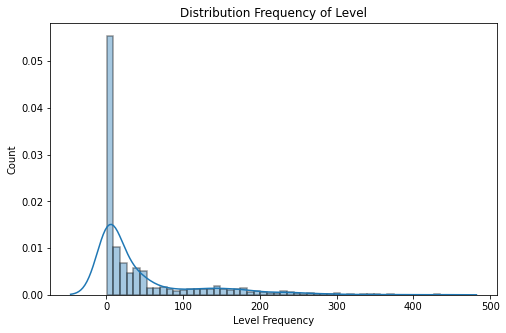

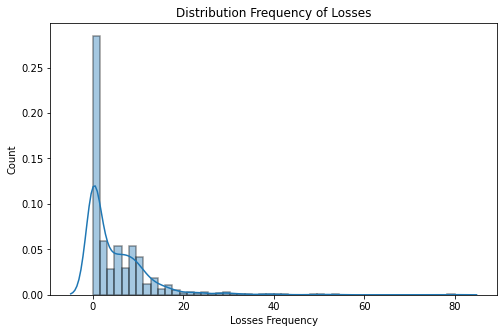

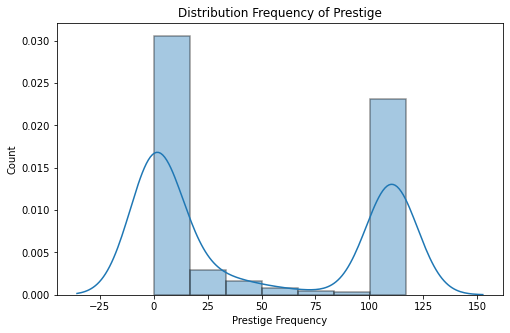

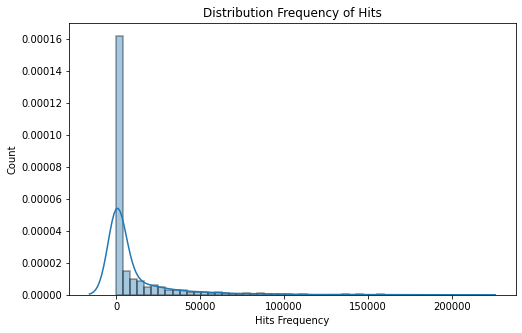

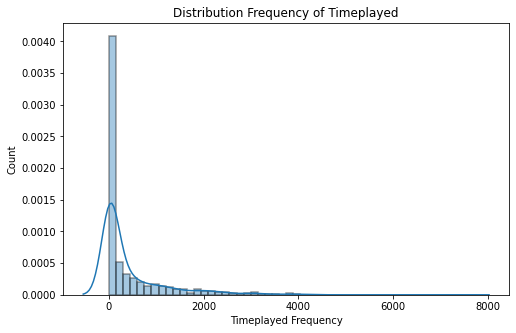

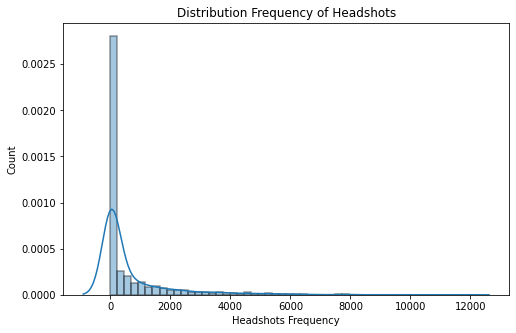

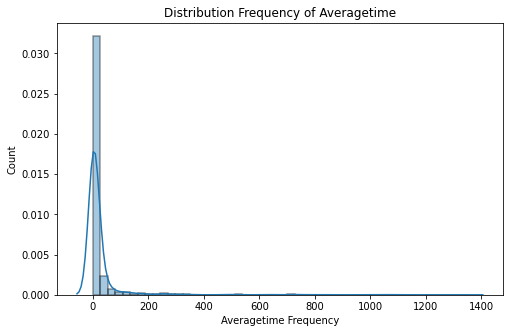

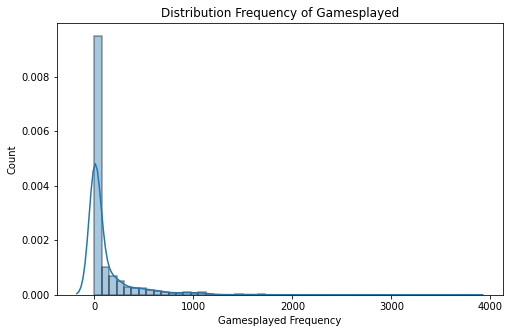

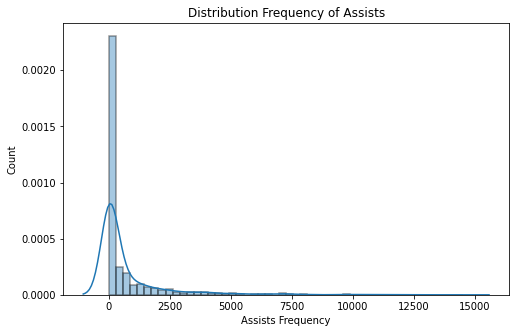

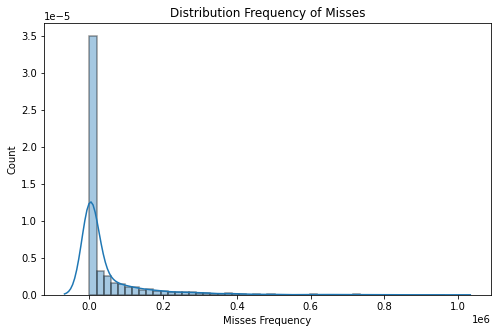

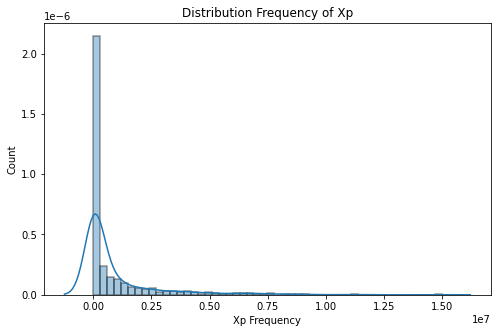

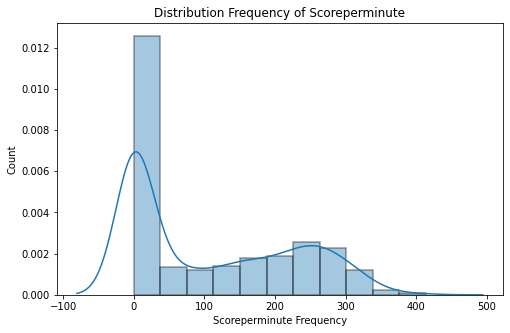

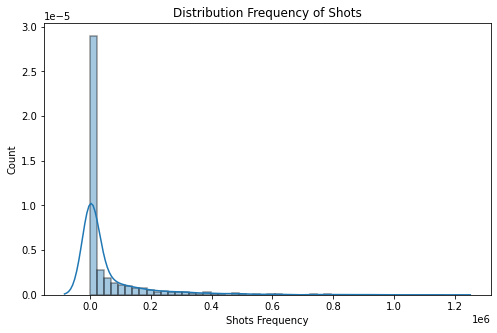

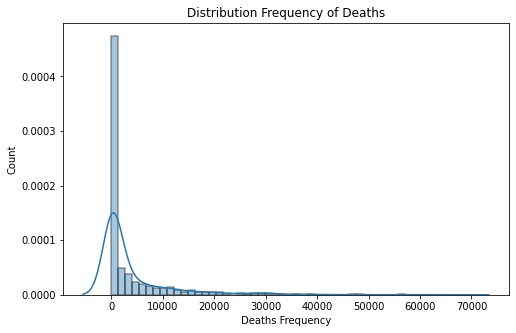

In [8]:
# visualization

df_columns = df.columns

for column in df_columns:
    fig = plt.figure(figsize = (8,5))
    ax = sns.distplot(df[column], hist=True, kde=True, hist_kws=dict(edgecolor="black", linewidth=1.5))

    ax.set_xlabel(f"{column.capitalize()} Frequency")
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution Frequency of {column.capitalize()}")

In [9]:
df.corr().style.background_gradient(cmap='coolwarm')

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
wins,1.000000,0.900201,0.386612,0.496721,0.845055,0.632532,0.392511,0.853138,0.934991,0.867875,-0.071429,0.931809,0.842728,0.879621,0.829105,0.340977,0.878899,0.912530
kills,0.900201,1.000000,0.406106,0.504433,0.875606,0.623952,0.371014,0.956512,0.881143,0.976575,-0.073888,0.920272,0.958100,0.947597,0.875062,0.353855,0.953966,0.983574
kdRatio,0.386612,0.406106,1.000000,0.504753,0.513195,0.512484,0.389929,0.380265,0.413756,0.419661,0.072248,0.361056,0.367282,0.369224,0.426856,0.451102,0.373149,0.373437
killstreak,0.496721,0.504433,0.504753,1.000000,0.534950,0.569522,0.294850,0.482832,0.486061,0.513845,-0.092810,0.472495,0.469738,0.477543,0.458867,0.451865,0.480904,0.490072
level,0.845055,0.875606,0.513195,0.534950,1.000000,0.665629,0.512850,0.797220,0.938933,0.880610,0.059675,0.774408,0.817353,0.803272,0.969955,0.263510,0.806073,0.861555
losses,0.632532,0.623952,0.512484,0.569522,0.665629,1.000000,0.358865,0.599764,0.634742,0.627122,-0.076287,0.657998,0.603573,0.600885,0.588177,0.493834,0.603631,0.621198
prestige,0.392511,0.371014,0.389929,0.294850,0.512850,0.358865,1.000000,0.327667,0.473250,0.374914,0.207348,0.336447,0.344325,0.336664,0.442993,0.013098,0.336605,0.376481
hits,0.853138,0.956512,0.380265,0.482832,0.797220,0.599764,0.327667,1.000000,0.812103,0.937531,-0.097044,0.900000,0.973379,0.968216,0.789628,0.381123,0.979051,0.945092
timePlayed,0.934991,0.881143,0.413756,0.486061,0.938933,0.634742,0.473250,0.812103,1.000000,0.865555,0.029985,0.869010,0.821605,0.836810,0.932366,0.245996,0.836215,0.889276
headshots,0.867875,0.976575,0.419661,0.513845,0.880610,0.627122,0.374914,0.937531,0.865555,1.000000,-0.068719,0.878931,0.938885,0.915486,0.876730,0.343639,0.924202,0.955821


### Data Preprocessing

In [10]:
# drop players who don't played more than 10 games

df = df.loc[(df['gamesPlayed'] > 10)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680 entries, 5 to 1551
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            680 non-null    int64  
 1   kills           680 non-null    int64  
 2   kdRatio         680 non-null    float64
 3   killstreak      680 non-null    int64  
 4   level           680 non-null    int64  
 5   losses          680 non-null    int64  
 6   prestige        680 non-null    int64  
 7   hits            680 non-null    int64  
 8   timePlayed      680 non-null    int64  
 9   headshots       680 non-null    int64  
 10  averageTime     680 non-null    float64
 11  gamesPlayed     680 non-null    int64  
 12  assists         680 non-null    int64  
 13  misses          680 non-null    int64  
 14  xp              680 non-null    int64  
 15  scorePerMinute  680 non-null    float64
 16  shots           680 non-null    int64  
 17  deaths          680 non-null    in

In [12]:
# remove outliers

def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    tmplList = list()
    for index in list(trueList.index):
        trueValue = True
        for column in list(trueList.columns):
            trueValue *= trueList.loc[index, column]
        tmplList.append(trueValue)
    trueList['used'] = tmplList
    return trueList 

df_clean = df[Remove_Outlier_Indices(df)['used']].copy()

# low_level_clean = low_level[Remove_Outlier_Indices(low_level)['used']].copy()
# mid_level_clean = mid_level[Remove_Outlier_Indices(mid_level)['used']].copy()
# high_level_clean = high_level[Remove_Outlier_Indices(high_level)['used']].copy()
# god_level_clean = god_level[Remove_Outlier_Indices(god_level)['used']].copy()

In [13]:
df_clean.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,4.340000e+02,434.000000,434.000000,434.000000
mean,218.029954,4971.504608,0.905874,12.322581,57.854839,8.649770,57.847926,14796.387097,517.269585,845.693548,3.129028,171.442396,924.426267,66494.580645,9.207224e+05,218.765523,81290.967742,5311.029954
std,201.946661,4783.911184,0.161143,3.759772,46.866767,3.513341,49.131157,13906.144134,490.714320,820.519089,1.267448,155.922977,893.559667,62080.043992,9.942883e+05,70.683993,75252.215508,4910.733400
min,2.000000,50.000000,0.493289,4.000000,4.000000,2.000000,0.000000,314.000000,15.000000,19.000000,1.307692,11.000000,9.000000,953.000000,1.325500e+04,56.102295,1371.000000,78.000000
25%,59.000000,1095.250000,0.812842,10.000000,23.000000,6.000000,6.000000,3773.500000,130.000000,178.250000,2.240170,43.250000,224.500000,17138.250000,1.974800e+05,163.600363,21515.250000,1352.500000
50%,155.000000,3319.000000,0.925456,12.000000,42.000000,8.000000,44.500000,10032.500000,354.000000,566.000000,2.681874,123.500000,641.000000,44317.000000,5.666420e+05,230.552926,55704.500000,3529.500000
75%,315.250000,7525.500000,1.009925,15.000000,81.750000,11.000000,110.000000,22318.250000,750.250000,1338.000000,3.646086,250.000000,1360.000000,100380.000000,1.267086e+06,272.526567,121504.000000,7998.750000
max,957.000000,24800.000000,1.346692,25.000000,201.000000,21.000000,116.000000,65095.000000,2461.000000,4500.000000,7.379747,750.000000,4322.000000,306262.000000,4.946488e+06,413.346108,371357.000000,24561.000000


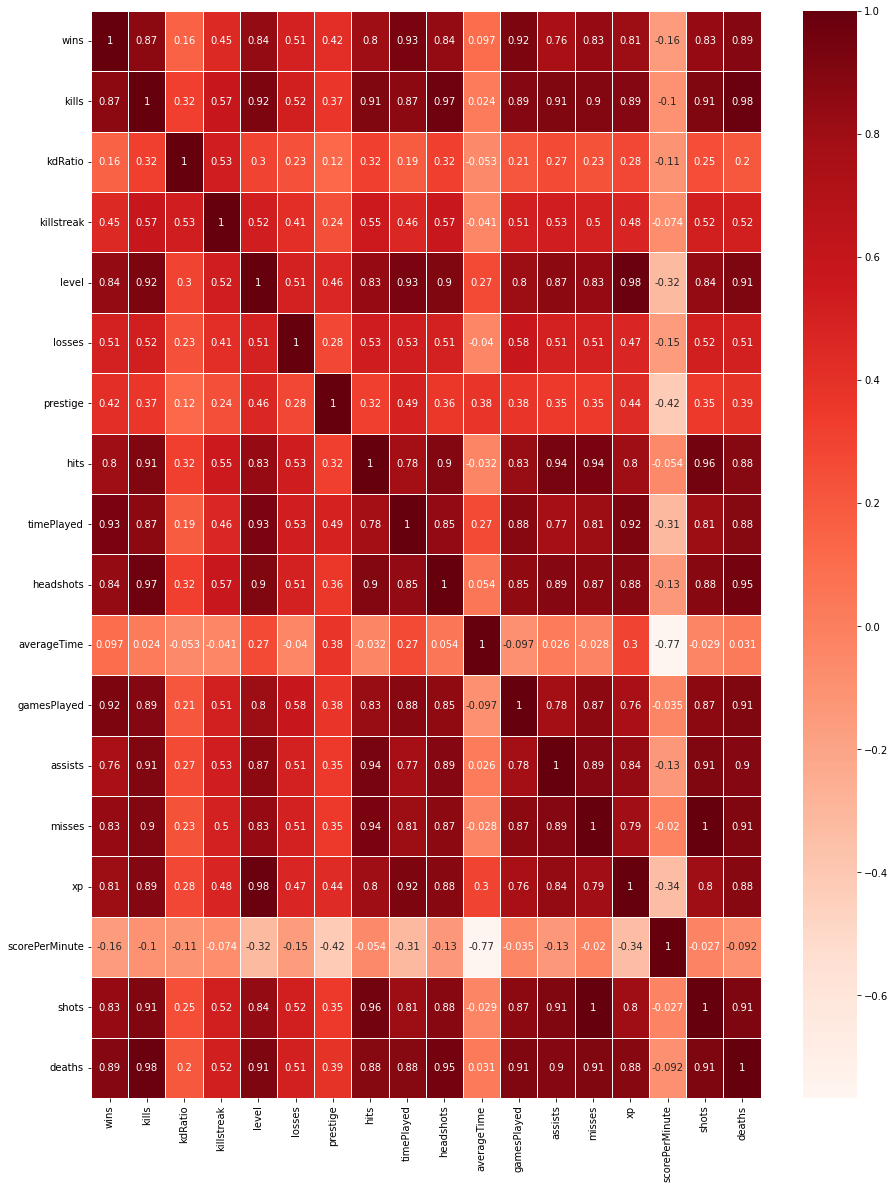

In [14]:
fig, ax = plt.subplots(figsize=(15,20))
dataplot = sns.heatmap(df_clean.corr(), cmap="Reds", annot=True, linewidths=.5)
plt.show()

In [15]:
fig.savefig('heatmap.png') 

### Normalize Data

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(df_clean[['timePlayed', 'kdRatio']])

StandardScaler()

In [18]:
# Rata-rata tiap fitur
scaler.mean_

array([517.26958525,   0.90587392])

In [19]:
# Variansi tiap fitur

scaler.var_

array([2.40245704e+05, 2.59073103e-02])

In [20]:
# Standar deviasi tiap fitur

for stdev in scaler.var_:
    print(sqrt(stdev))

490.148654819624
0.16095747966268867


In [21]:
# Normalisasi seluruh data

df_clean_used = scaler.transform(df_clean[['timePlayed', 'kdRatio']])

In [22]:
df_clean_used

array([[ 6.67765063e-02, -2.08903662e+00],
       [-2.84137443e-01, -1.29274685e+00],
       [-5.35081720e-01,  2.50072977e-01],
       [-1.96408955e-01,  6.46854625e-01],
       [ 1.29701552e+00, -3.26753001e-01],
       [-9.10478037e-01,  2.08646922e-01],
       [-8.67633892e-01, -1.31198289e+00],
       [-8.96196656e-01,  2.10693319e-01],
       [-8.53352511e-01, -1.18603617e+00],
       [-7.10538694e-01,  1.49176964e+00],
       [-1.01248791e+00,  4.81241466e-01],
       [-5.53443496e-01, -1.60660674e+00],
       [-4.02468890e-01,  7.37463969e-01],
       [ 1.35618125e+00, -3.39259252e-01],
       [-7.88066195e-01,  6.91246007e-03],
       [-9.71683959e-01, -2.24368000e+00],
       [-5.35951389e-02,  1.00117143e+00],
       [ 6.52313154e-01, -1.45677059e-02],
       [-8.32950537e-01,  7.14451176e-01],
       [-9.75764353e-01, -5.34715704e-01],
       [-4.41232641e-01,  1.18898361e+00],
       [-4.55514022e-01,  1.88417112e-01],
       [-5.28961128e-01, -9.97881351e-01],
       [ 2.

### Building FCM Model

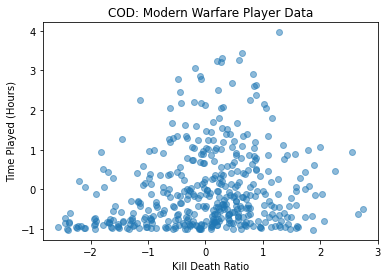

In [23]:
# data visualization for determine number of cluster

plt.scatter(df_clean_used[:,1], df_clean_used[:,0], alpha=.5)
plt.title('COD: Modern Warfare Player Data')
plt.xlabel('Kill Death Ratio')
plt.ylabel('Time Played (Hours)')
plt.savefig('basic-output.jpg')
plt.show()

In [24]:
fcm_test = FCM()

In [25]:
fcm_cls = FCM(n_clusters=4, m=1.25, random_state=4)
fcm_cls.fit(df_clean_used)

In [26]:
# outputs

fcm_centers = fcm_cls.centers
fcm_labels = fcm_cls.predict(df_clean_used)

In [27]:
fcm_centers

array([[ 0.7408089 ,  0.28200476],
       [-0.54644886,  0.65022462],
       [ 2.46025634,  0.25256244],
       [-0.57753857, -1.22786706]])

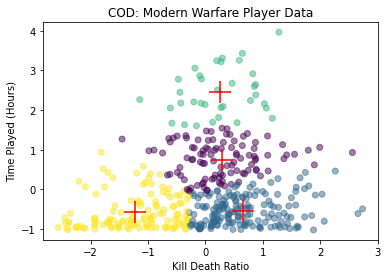

In [28]:

plt.scatter(df_clean_used[:,1], df_clean_used[:,0], c=fcm_labels, alpha=.5)
plt.scatter(fcm_centers[:,1], fcm_centers[:,0], marker="+", s=500, c='red')
plt.title('COD: Modern Warfare Player Data')
plt.xlabel('Kill Death Ratio')
plt.ylabel('Time Played (Hours)')
# plt.savefig('basic-clustering-output.jpg')
plt.show()

In [29]:
# memasukkan hasil prediksi ke dalam dataframe

df_clean['label'] = fcm_cls.predict(df_clean_used)
df_clean['label']

7       3
15      3
16      1
18      1
19      0
       ..
1545    0
1546    1
1548    1
1549    3
1550    0
Name: label, Length: 434, dtype: int64

In [31]:
# export data based on label for better visualization in excel

for c in range(0, 4):
    df_export = df_clean.loc[df_clean['label'] == c]
    df_export.to_excel(f'{c}_data.xlsx')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

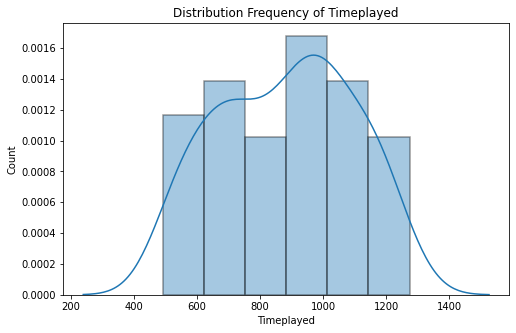

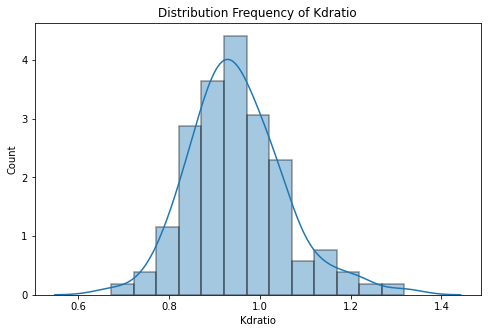

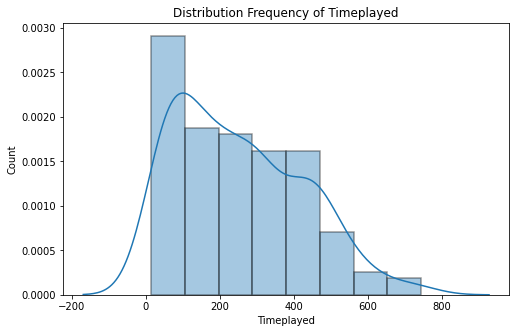

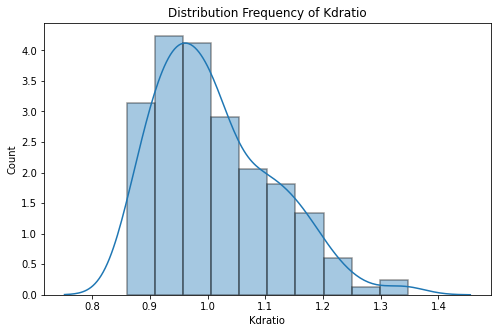

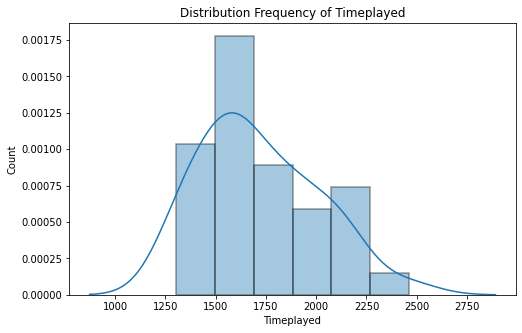

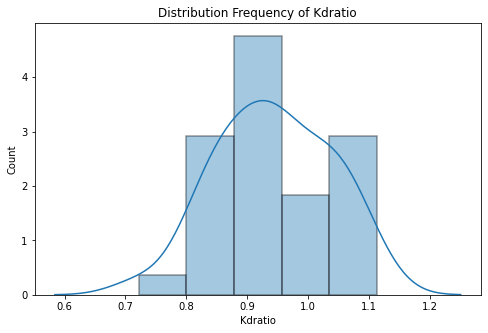

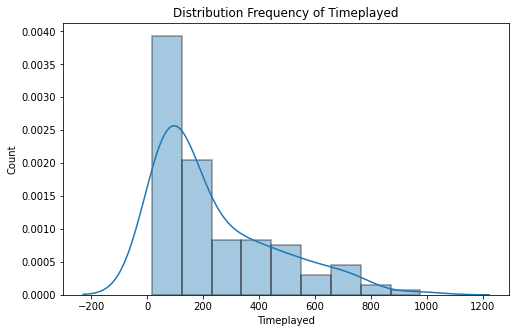

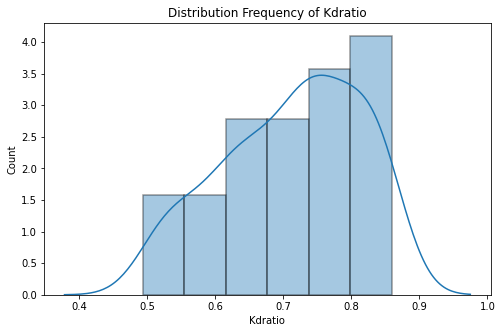

In [65]:
# visualization and save data to excel for analysis purpose

df_columns = ['timePlayed', 'kdRatio']

for i in range(0, 4):
    for column in df_columns:
        fig = plt.figure(figsize = (8,5))
        ax = sns.distplot(df_clean.loc[df_clean['label']==i, column], hist=True, kde=True, hist_kws=dict(edgecolor="black", linewidth=1.5))

        ax.set_xlabel(f"{column.capitalize()}")
        ax.set_ylabel("Count")
        ax.set_title(f"Distribution Frequency of {column.capitalize()}")
        # plt.savefig(f'fix-{i+1}{column}.jpg')
    # df_clean.loc[df_clean['label']==i].describe().to_excel(f'descriptive_statistic_analysis {i+1}.xlsx')

In [66]:
# descriptive statistic for label 3

df_clean.loc[df_clean['label']==3].describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,label
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.00000,1.240000e+02,124.000000,124.000000,124.000000,124.0
mean,109.548387,1698.661290,0.712212,9.467742,26.443548,7.040323,41.870968,5771.725806,235.822581,298.572581,3.230252,75.572581,388.266129,29794.50000,3.098304e+05,229.969099,35566.225806,2353.000000,3.0
std,107.312882,1549.814733,0.100673,2.858266,15.239712,2.733113,49.202249,5745.774804,214.462878,284.402788,1.256709,69.063912,394.748394,29856.19242,2.867948e+05,73.705408,35292.377406,2143.406384,0.0
min,4.000000,50.000000,0.493289,4.000000,5.000000,2.000000,0.000000,399.000000,17.000000,22.000000,1.307692,11.000000,20.000000,953.00000,2.065500e+04,65.434114,1371.000000,78.000000,3.0
25%,26.750000,533.000000,0.637550,8.000000,14.750000,5.000000,0.000000,1649.000000,72.000000,97.500000,2.398614,21.000000,113.250000,7683.50000,9.487525e+04,184.342470,9372.750000,751.750000,3.0
50%,68.000000,1098.000000,0.727969,9.000000,23.000000,7.000000,12.500000,3782.000000,147.000000,170.000000,2.903251,48.000000,271.000000,18937.00000,2.022515e+05,248.282028,23308.500000,1506.000000,3.0
75%,165.250000,2416.250000,0.795867,11.000000,37.250000,8.250000,110.000000,6931.750000,350.750000,465.500000,3.647436,101.250000,488.750000,40421.50000,4.641480e+05,284.064419,47197.250000,3410.000000,3.0
max,493.000000,6326.000000,0.859559,21.000000,72.000000,18.000000,111.000000,28963.000000,977.000000,1558.000000,7.368421,334.000000,1792.000000,127581.00000,1.145031e+06,413.346108,151742.000000,9942.000000,3.0


In [39]:
# parameter analysis
for m in [1.25, 1.5, 1.75, 2, 3, 4]:
    excel_output = pd.DataFrame(columns=['P', 'C', 'PIC', 'PEC'])
    for n in range(4, 5):
        fcm_cls = FCM(m=m, n_clusters=n)
        fcm_cls.fit(df_clean_used)
        data_row = [m, n, fcm_cls.partition_coefficient, fcm_cls.partition_entropy_coefficient]
        excel_output.loc[len(excel_output.index)] = data_row
    excel_output.to_excel('clean_used_timePlayed' + str(m) + '.xlsx') 